In [16]:
import numpy as np 
from numpy import exp
%matplotlib inline
import matplotlib.pyplot as plt

import csv
import random




N=10000
C=4
Z=2
L=C*Z
q=0.1


y=[0] * N
x=[ [0]*L for j in range(N) ]
v0=[0]*Z
v1=[1]*Z

case=(v1 + v0 + v1 + v0,
     v0 + v1 + v1 + v0,
     v1 + v0 + v0 + v1,
     v0 + v1 + v0 + v1 ,
     v1+ v1 +  v1 + v1)

# print('_______________ 5 cases ')
# for c in range (C):
#     print('*',c,'*  ',*case[c],sep="")




random.seed(12345)

for i in range(N):
    y[i] = random.randint(0,4)
    x[i][:] = case[y[i]]
    for j in range (L):
        if random.random()<0.1:
            x[i][j]=1-x[i][j]

# print("______________DATA")
# for i in range(10):
   # print('"',y[i],'"  ',*x[i],sep="")
# print('.....')    

fname='dataRBM_q'+str(q)+'.csv'
#print(fname)
with open (fname,mode='w') as myfile:
    writer=csv.writer(myfile,delimiter=',')
    for i in range(N):
   # print(x[i])
        writer.writerow(x[i])
    
fname='dataRBM_q0.1.csv'
data=np.loadtxt(fname,delimiter=",",dtype=int)
N=len(data)
L=len(data[1])
# print(f'each of N={N} data has L={L} digits')

v=2*data-1
v0=np.zeros_like(v)
v0[:]=v[:]


#for k in range(10):
   # print(data[k],v[k])
#print('....')

np.random.seed(12342)
M=2

sigma=np.sqrt(4./float(L+M))
w=sigma*(2*np.random.rand(L,M) - 1 )
a=sigma*(2*np.random.rand(L) - 1)
b=np.zeros(M)
# print(w)
# print(a)
# print(b)
w0,a0,b0=w,a,b

def create_coord(np,x0):
    x=[x0]*np
    #print(x)
    y=list(range(np))
    #print(y)
    for i in range(np):
        y[i]=y[i]/(np-1.) -0.5
    return (x,y)

(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1)


def mycolor(val):
    if val > 0:
        return 'red'
    elif val <0:
        return 'blue'
    return 'black'


# def plotgraph(epoch=0):
 #   A=2./w.max()
   # print(A)
   # for i in range(L):
     #   for j in range(M):
           # ex,ey,col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            #plt.plot(ex,ey,col,zorder=1,lw=A*np.abs(w[i][j]))

   # PS=400
   # PSmin=40

   # for i in range(L):
   #     plt.scatter(x1[i],y1[i],s=max(PSmin,PS*np.abs(a[i]) ) ,zorder=2,c=mycolor(a[i]) )
   # for j in range(M):
     #   plt.scatter(x2[j],y2[j],s=max(PSmin,PS*np.abs(b[j]) ) ,zorder=2,c=mycolor(b[j]),marker='s' )


   # plt.title(f'>0 red, <0 blue,epoch={epoch}')
   # plt.show()

# plotgraph()

temp=[]
c_c=[]

for s_t in range(60):
    beta=1.5*s_t                       #temperature
    print("For beta =",beta," obtain :")
    
    def activate(v_in,wei,bias,beta=beta,info=False):
        act = np.dot(v_in,wei)+bias
        prob = 1./(1. +exp(-act*beta) )
        n= np.shape(act)
        v_out= -np.ones( n,dtype=int )
        v_out[np.random.random_sample(n) < prob]=1
        #if info:
            #print('input=',v_in)
            #print('act =',act)
            #print('prob=',prob)
            #print('output=',v_out)
        return v_out

    k=0
    activate(v[k],w,b,info=True)
    
    
    
    #plotgraph(0)

    l_rate=1.0

    mini,m=500,0

    max_epoch=20

    for epoch in range(1,1+max_epoch):
        l_rate_m=l_rate/mini
        for k in range(N):
            if m==0:
                v_data,v_model= np.zeros(L),np.zeros(L)
                h_data,h_model= np.zeros(M),np.zeros(M)
                vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

                h=activate(v[k],w,b)
                vf=activate(h,w.T,a)
                hf=activate(vf,w,b)

                v_data += v[k]
                v_model += vf
                h_data += h
                h_model +=hf
                vh_data += np.outer(v[k].T,h)
                vh_model += np.outer( vf.T,hf)

            m += 1

            if m==mini:

                dw=l_rate_m*(vh_data -vh_model )
                da=l_rate_m*(v_data-v_model)
                db=l_rate_m*(h_data- h_model)

                #if epoch<=2 and k<=mini:
                    #print('----------- epoch =',epoch,'  k=',k,'   m=',m)
                    #print('dw =',dw)
                    #print('da =',da)
                    #print(' db= ',db)

                w= w+dw
                a= a+da
                b= b+db
                m=0

        #print('completed epoch',epoch,'with l_rate =',l_rate)

        np.random.shuffle(v)
        l_rate=l_rate/(0.2*l_rate +1)
        #plotgraph(epoch)

        v1 = np.zeros_like(v0)
        for k in range(N):
            h=activate(v0[k],w,b)
            v1[k]=activate(h,w.T,a)

        diff=(v1-v0)/2
        #str0='M'+str(M)+'-min'+str(mini)+fname
        #np.savetxt('fant-'+str0,(v1+1)/2,fmt='%d',delimiter=',')
        #np.savetxt('diff-'+str0,diff,fmt='%d',delimiter=',')

        Z=int(L/4)
        vv0=[0]*Z
        vv1=[1]*Z
        case=(vv1+vv0+vv1+vv0,
              vv0+vv1+vv1+vv0,
              vv1+vv0+vv0+vv1,
              vv0+vv1+vv0+vv1,
              vv1+vv1+vv1+vv1)

        fcc=0
        for k in range(v0.shape[0]):
            vec0=( (v0[k]+1)/2).astype(int) 
            vec1=( (v1[k]+1)/2).astype(int)
            is0=(vec1==case[0]).all()
            is1=(vec1==case[1]).all()
            is2=(vec1==case[2]).all()
            is3=(vec1==case[3]).all()
            if is0 or is1 or is2 or is3 ==True:
                #print(vec0,vec1,(is0 or is1 or is2 or is3 ))
                fcc+=1/v0.shape[0]

    print('the fraction of closest categories is : ',fcc*100)
    temp.append(beta)
    c_c.append(fcc)


plt.plot(temp,c_c)    
    
    

For beta = 0.0  obtain :
the fraction of closest categories is :  1.6999999999999953
For beta = 1.5  obtain :
the fraction of closest categories is :  2.0399999999999934
For beta = 3.0  obtain :
the fraction of closest categories is :  5.170000000000045
For beta = 4.5  obtain :
the fraction of closest categories is :  14.869999999999994
For beta = 6.0  obtain :
the fraction of closest categories is :  25.889999999998782
For beta = 7.5  obtain :
the fraction of closest categories is :  34.46999999999784
For beta = 9.0  obtain :
the fraction of closest categories is :  37.899999999997455
For beta = 10.5  obtain :
the fraction of closest categories is :  41.289999999997086
For beta = 12.0  obtain :
the fraction of closest categories is :  37.02999999999756
For beta = 13.5  obtain :
the fraction of closest categories is :  40.229999999997204
For beta = 15.0  obtain :
the fraction of closest categories is :  35.24999999999775
For beta = 16.5  obtain :
the fraction of closest categories is :

AttributeError: 'list' object has no attribute 'shape'

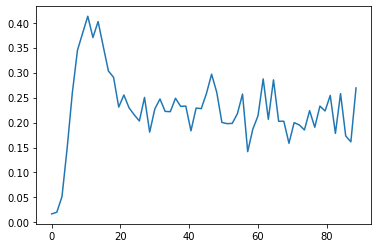

In [19]:
plt.plot(temp,c_c,) 